In [233]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import preprocessing
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.classifiers.fundamentals import Sector

In [239]:
def make_pipeline():
    industry=morningstar.asset_classification.morningstar_industry_group_code.latest
    financial_health=morningstar.asset_classification.financial_health_grade.latest
    pipe_screen=(QTradableStocksUS()&financial_health.notnull()&(~industry.eq(31055)))
    pipe=Pipeline(screen=pipe_screen,columns={'sector': Sector()})
    return pipe

In [235]:
start_date='2013-1-1'
end_date='2017-12-31'

In [240]:
output=run_pipeline(make_pipeline(),end_date,end_date)
output

sector
2018-01-02 00:00:00+00:00 Equity(2 [ARNC])           310
                          Equity(24 [AAPL])          311
                          Equity(31 [ABAX])          206
                          Equity(41 [ARCB])          310
                          Equity(52 [ABM])           310
                          Equity(53 [ABMD])          206
                          Equity(62 [ABT])           206
                          Equity(64 [ABX])           101
                          Equity(67 [ADSK])          311
                          Equity(76 [TAP])           205
                          Equity(110 [ACXM])         311
                          Equity(114 [ADBE])         311
                          Equity(122 [ADI])          311
                          Equity(128 [ADM])          205
                          Equity(154 [AEM])          101
                          Equity(161 [AEP])          207
                          Equity(166 [AES])          207
                          Equity(185 [AFL])          103
                          Equity(197 [AGCO])         310
                          Equity(216 [HES])          309
                          Equity(239 [AIG])          103
                          Equity(247 [AIN])          102
                          Equity(253 [AIR])          310
                          Equity(266 [AJG])          103
                          Equity(289 [MATX])         310
                          Equity(300 [ALK])          310
                          Equity(301 [ALKS])         206
                          Equity(311 [ALOG])         206
                          Equity(337 [AMAT])         311
                          Equity(351 [AMD])          311
...                                                  ...
                          Equity(50430 [LW])         205
                          Equity(50444 [LEXE_A])     311
                          Equity(50499 [EVHC])       206
                          Equity(50509 [ICHR])       311
                          Equity(50518 [ATH])        103
                          Equity(50526 [LGF_A])      102
                          Equity(50533 [CNDT])       310
                          Equity(50534 [HGV])        102
                          Equity(50535 [PK])         104
                          Equity(50537 [WRD])        309
                          Equity(50595 [BIVV])       206
                          Equity(50606 [VREX])       206
                          Equity(50612 [FRAC])       309
                          Equity(50616 [ANAB])       206
                          Equity(50633 [JAG])        309
                          Equity(50634 [JELD])       101
                          Equity(50636 [REVG])       102
                          Equity(50639 [LAUR])       205
                          Equity(50642 [INVH])       104
                          Equity(50683 [SNAP])       311
                          Equity(50690 [CJ])         309
                          Equity(50713 [GOOS])       102
                          Equity(50716 [DXC])        311
                          Equity(50718 [PUMP])       309
                          Equity(50719 [MULE])       311
                          Equity(50735 [AYX])        311
                          Equity(50749 [BTU])        101
                          Equity(50758 [OKTA])       311
                          Equity(50763 [SNDR])       310
                          Equity(50782 [UPL])        309

[2126 rows x 1 columns]

In [98]:
asset_list=output.index.levels[1].unique()

In [99]:
asset_prices= get_pricing(asset_list,start_date,end_date,fields='close_price')
asset_prices=asset_prices.dropna(axis=1)
asset_list=asset_prices.columns

In [102]:
end_date='2015-12-31'

In [103]:
asset_prices=get_pricing(asset_list,start_date,end_date,fields='close_price')

In [104]:
asset_prices.shape

(756, 1676)

In [105]:
asset_returns=asset_prices.pct_change()[1:]

In [108]:
n_com = 200
pca = PCA(n_components=n_com)
pca.fit(asset_returns)

PCA(copy=True, n_components=200, whiten=False)

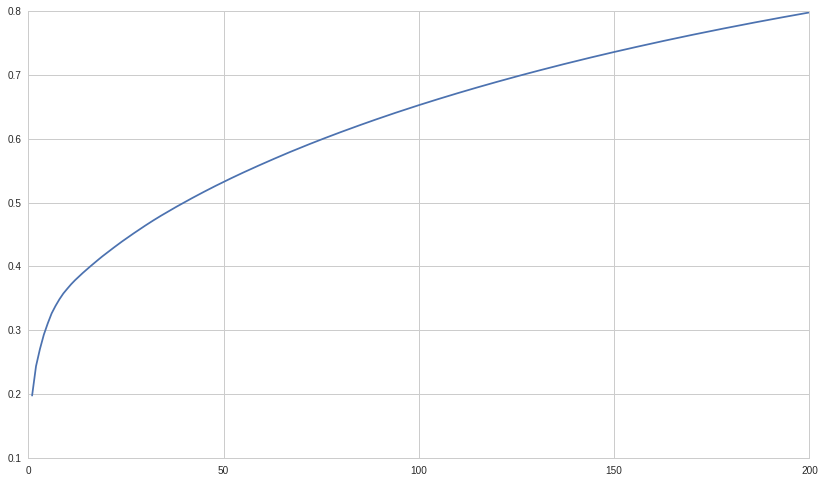

In [110]:
plt.figure()
plt.plot(range(1,201),np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [111]:
n_com = 50
pca = PCA(n_components=n_com)
pca.fit(asset_returns)

PCA(copy=True, n_components=50, whiten=False)

In [112]:
X=pca.components_.T

In [194]:
X = preprocessing.StandardScaler().fit_transform(X)
clf1 = DBSCAN(eps=1.6, min_samples=2)
clf1.fit(X)

DBSCAN(algorithm='auto', eps=1.6, leaf_size=30, metric='euclidean',
    min_samples=2, p=None, random_state=None)

In [183]:
def count_clusters(clf):
    return len(set(clf.labels_)) - (1 if -1 in clf.labels_ else 0)

In [195]:
count_clusters(clf1)

22

In [155]:
standard_asset_price= preprocessing.StandardScaler().fit_transform(asset_prices)

In [133]:
n_com = 50
pca = PCA(n_components=n_com)
pca.fit(standard_asset_price)

PCA(copy=True, n_components=50, whiten=False)

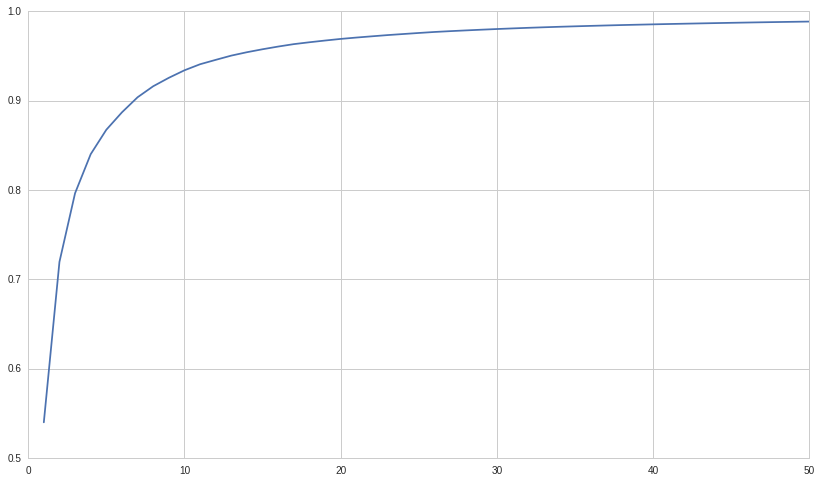

In [134]:
plt.figure()
plt.plot(range(1,51),np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [145]:
n_com = 10
pca = PCA(n_components=n_com)
pca.fit(standard_asset_price)

PCA(copy=True, n_components=10, whiten=False)

In [146]:
X=pca.components_.T
X = preprocessing.StandardScaler().fit_transform(X)

In [156]:
clf2 = DBSCAN(eps=2, min_samples=2)
clf2.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
    min_samples=2, p=None, random_state=None)

In [157]:
count_clusters(clf2)

20

In [196]:
clustered_series1 = pd.Series(index=asset_returns.columns, data=clf1.labels_.flatten())
clustered_series1.value_counts()

 0     1028
-1      600
 11       6
 7        3
 8        3
 9        2
 1        2
 2        2
 3        2
 4        2
 5        2
 6        2
 20       2
 19       2
 21       2
 12       2
 13       2
 14       2
 15       2
 16       2
 17       2
 18       2
 10       2
dtype: int64

In [251]:
count=0
significant=0
for i in range(1,21):
    cluster=clustered_series1[clustered_series1==i].index
    for j in range(len(cluster)-1):
        for k in range(j+1,len(cluster)):
            s1=cluster[j]
            s2=cluster[k]
            p=coint(asset_prices.loc[:,s1],asset_prices.loc[:,s2])[1]
            count+=1
            if p<0.01:
                significant+=1
                print("{} {} {} cluster: {}".format(s1,s2,p,i))
                print("sector code: {} {}".format(output.xs(symbols(s1),level=1).sector[0],output.xs(symbols(s2),level=1).sector[0]))

Equity(1287 [CBI]) Equity(13508 [CLB]) 0.00185675821716 cluster: 2
sector code: 310 309
Equity(2237 [DNB]) Equity(4751 [MDP]) 0.0082691425446 cluster: 3
sector code: 310 102
Equity(2633 [ETN]) Equity(7962 [CBS]) 0.00444188535284 cluster: 4
sector code: 310 102
Equity(2696 [FAST]) Equity(7897 [VMI]) 0.000276763997095 cluster: 5
sector code: 310 310
Equity(3190 [GGG]) Equity(8107 [WTS]) 0.0047944335517 cluster: 7
sector code: 310 310
Equity(5607 [OGE]) Equity(24064 [CNP]) 0.000329663282108 cluster: 10
sector code: 207 207
Equity(7408 [TEX]) Equity(7580 [TRMB]) 0.000388935465602 cluster: 11
sector code: 310 311
Equity(26882 [LVS]) Equity(43712 [RESI]) 0.000566444380265 cluster: 11
sector code: 102 104
Equity(10793 [MINI]) Equity(24862 [STAR]) 0.00323567927888 cluster: 12
sector code: 310 104
Equity(21935 [SJM]) Equity(34442 [G]) 0.0043583913944 cluster: 15
sector code: 205 310
Equity(24819 [EBAY]) Equity(26956 [PHH]) 0.00117200778434 cluster: 16
sector code: 102 103
Equity(26386 [SFL]) Eq

In [204]:
count

38

In [205]:
significant

13

In [206]:
pairs1=[('CBI','CLB'),('ETN','CBS'),('FAST','VMI'),('OGE','CNP'),('TEX','TRMB'),('MINI','STAR'),('SJM','G'),('EBAY','PHH'),('SFL','PSX'),('WU','TSRO')]

In [168]:
clustered_series2 = pd.Series(index=asset_returns.columns, data=clf2.labels_.flatten())
clustered_series2.value_counts()

 0     1277
-1      357
 12       5
 9        3
 8        2
 1        2
 2        2
 3        2
 4        2
 5        2
 6        2
 7        2
 18       2
 17       2
 19       2
 11       2
 13       2
 14       2
 15       2
 16       2
 10       2
dtype: int64

In [250]:
count=0
significant=0
for i in range(1,20):
    cluster=clustered_series2[clustered_series2==i].index
    for j in range(len(cluster)-1):
        for k in range(j+1,len(cluster)):
            s1=cluster[j]
            s2=cluster[k]
            p=coint(asset_prices.loc[:,s1],asset_prices.loc[:,s2])[1]
            count+=1
            if p<0.01:
                significant+=1
                print("{} {} {} cluster: {}".format(s1,s2,p,i))
                print("sector code: {} {}".format(output.xs(symbols(s1),level=1).sector[0],output.xs(symbols(s2),level=1).sector[0]))

Equity(351 [AMD]) Equity(24855 [AIT]) 0.00159129523605 cluster: 1
sector code: 311 310
Equity(5607 [OGE]) Equity(24064 [CNP]) 0.000329663282108 cluster: 5
sector code: 207 207
Equity(5660 [OMI]) Equity(32714 [LDOS]) 6.53282110237e-05 cluster: 6
sector code: 206 311
Equity(6925 [SKYW]) Equity(18759 [IOSP]) 0.00302288629975 cluster: 7
sector code: 310 101
Equity(8399 [ZION]) Equity(22563 [SGEN]) 0.00264597760715 cluster: 9
sector code: 103 206
Equity(12856 [AGU]) Equity(32095 [PRTK]) 0.00242010696707 cluster: 11
sector code: 101 206
Equity(16389 [NCR]) Equity(20947 [KTOS]) 0.000467321369623 cluster: 14
sector code: 311 310
Equity(16754 [FBC]) Equity(21366 [OCLR]) 0.000235744016337 cluster: 15
sector code: 103 311
Equity(24819 [EBAY]) Equity(26956 [PHH]) 0.00117200778434 cluster: 17
sector code: 102 103
Equity(38538 [MDSO]) Equity(42815 [SPLK]) 9.01686383819e-05 cluster: 19
sector code: 311 311


In [208]:
count

30

In [209]:
significant

10

In [180]:
pairs2=[('AMD','AIT'),('OGE','CNP'),('OMI','LDOS'),('SKYW','IOSP'),('ZION','SGEN'),('AGU','PRTK'),('NCR','KTOS'),('FBC','OCLR'),('EBAY','PHH'),('MDSO','SPLK')]

In [210]:
pairs1

[('CBI', 'CLB'),
 ('ETN', 'CBS'),
 ('FAST', 'VMI'),
 ('OGE', 'CNP'),
 ('TEX', 'TRMB'),
 ('MINI', 'STAR'),
 ('SJM', 'G'),
 ('EBAY', 'PHH'),
 ('SFL', 'PSX'),
 ('WU', 'TSRO')]

In [211]:
pairs2

[('AMD', 'AIT'),
 ('OGE', 'CNP'),
 ('OMI', 'LDOS'),
 ('SKYW', 'IOSP'),
 ('ZION', 'SGEN'),
 ('AGU', 'PRTK'),
 ('NCR', 'KTOS'),
 ('FBC', 'OCLR'),
 ('EBAY', 'PHH'),
 ('MDSO', 'SPLK')]

In [219]:
beta1=[]
for p in pairs1:
    s1=p[0]
    s2=p[1]
    model=sm.OLS(asset_prices.loc[:,symbols(s1)],asset_prices.loc[:,symbols(s2)])
    beta1.append(model.fit().params[0])

In [220]:
beta1

[0.41656648926980155,
 1.1814967812238177,
 0.32805941405266326,
 1.5415380133153769,
 1.0741530984090388,
 2.788303966644766,
 5.1761642920189974,
 2.2466912063448463,
 0.19884958797409863,
 0.41912473327020894]

In [229]:
beta2=[]
for p in pairs2:
    s1=p[0]
    s2=p[1]
    model=sm.OLS(asset_prices.loc[:,symbols(s1)],asset_prices.loc[:,symbols(s2)])
    beta2.append(model.fit().params[0])

In [230]:
beta2

[0.071660329683977703,
 1.5415380133153769,
 0.82127364944403747,
 0.32106429886679783,
 0.70640457208697205,
 4.358749852409165,
 4.8540941284237924,
 8.1511234740595668,
 2.2466912063448463,
 0.78057494236212355]

In [248]:
output.xs(symbols('AMD'),level=1).sector[0]

311